# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [28]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [29]:
# load imdb dataset as pandas dataframe
imdb_df = pd.read_csv("data/imdb_1000.csv")

In [30]:
# show first 5 rows of imdb_df
imdb_df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [31]:
# load bikes dataset as pandas dataframe
bikes_df = pd.read_csv("data/bikes.csv", sep=";", parse_dates=['Date'])

In [32]:
# show first 3 rows of bikes_df
bikes_df.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [33]:
# list columns of imdb_df
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [34]:
# what are the datatypes of values in columns
imdb_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [35]:
# list first 5 movie titles
imdb_df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [36]:
# show only movie title and genre
imdb_df[['title', 'genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [37]:
# show the type of duration column
print(imdb_df['duration'].dtype)

int64


In [38]:
# show duration values of movies as numpy arrays
imdb_df['duration'].values[:10]

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139], dtype=int64)

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [39]:
# convert all the movie titles to uppercase
to_uppercase = lambda x: x.upper()
imdb_df['title'].apply(to_uppercase).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

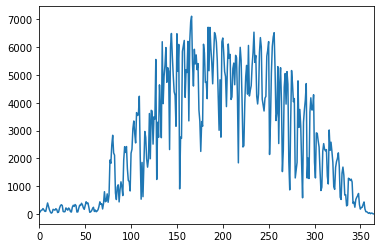

In [40]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt 

bikes_df['Berri1'].plot()


In [41]:
# plot all the columns of bikes_df
bikes_df.columns

Index(['Date', 'Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')

## Value counts

Get count of unique values in a particular column/Series.

In [42]:
# what are the unique genre in imdb_df?
a=imdb_df['genre'].value_counts()==1

print(a)

Drama        False
Comedy       False
Action       False
Crime        False
Biography    False
Adventure    False
Animation    False
Horror       False
Mystery      False
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
History       True
Fantasy       True
Name: genre, dtype: bool


AxesSubplot(0.125,0.125;0.775x0.755)


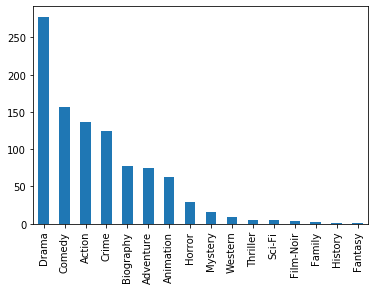

In [43]:
# plotting value counts of unique genres as a bar chart
print(imdb_df['genre'].value_counts().plot.bar())

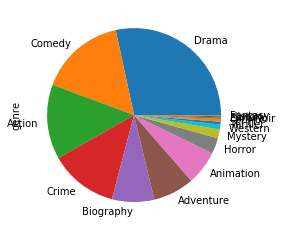

In [44]:
# plotting value counts of unique genres as a pie chart
imdb_df['genre'].value_counts().plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [45]:
# show index of bikes_df
print(bikes_df.head(10))

        Date Unnamed: 1  Rachel / Papineau  Berri1  Maisonneuve_2  \
0 2012-01-01      00:00                 16      35             51   
1 2012-02-01      00:00                 43      83            153   
2 2012-03-01      00:00                 58     135            248   
3 2012-04-01      00:00                 61     144            318   
4 2012-05-01      00:00                 95     197            330   
5 2012-06-01      00:00                 75     146            244   
6 2012-07-01      00:00                 54      98            108   
7 2012-08-01      00:00                 63      95             98   
8 2012-09-01      00:00                173     244            432   
9 2012-10-01      00:00                241     397            563   

   Maisonneuve_1  Brébeuf  Parc  PierDup  CSC (Côte Sainte-Catherine)  \
0             38      5.0    26       10                            0   
1             68     11.0    53        6                            1   
2            104     

In [46]:
# get row for date 2012-01-01
bikes_df.loc[bikes_df["Date"]=="01/01/2012"]

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [47]:
# show 11th row of imdb_df using iloc
imdb_df.iloc[11]

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [48]:
# select only those movies where genre is adventure
imdb_df.loc[imdb_df["genre"]=="Adventure"]

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [49]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
from collections import Counter
c=Counter(imdb_df["genre"].loc[imdb_df["star_rating"]>8])
l=list(zip(c.keys(),c.values()))
sorted(l,key=lambda x:x[1],reverse=True)[0][0]

'Drama'

## Adding a new column to DataFrame

In [53]:
# add a weekday column to bikes_df
import datetime as dt


## Deleting an existing column from DataFrame

In [52]:
# remove column 'Unnamed: 1' from bikes_df


## Deleting a row in DataFrame

In [55]:
# remove row no. 1 from bikes_df
bikes_df.drop(1,axis=0)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-04-01,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-05-01,00:00,95,197,330,124,6.0,97,13,2,16.0
5,2012-06-01,00:00,75,146,244,98,4.0,86,4,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN
362,2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN
363,2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN
364,2012-12-30,00:00,0,5,1,5,NaN,6,0,0,NaN


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [60]:
# group imdb_df by movie genres
imdb=imdb_df.groupby("genre")

In [61]:
# get crime movies group
imdb.get_group("Crime")

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,122.298387,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...,...
927,7.5,Brick,R,Crime,122.298387,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,Crime,122.298387,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,Crime,122.298387,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,Crime,122.298387,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [62]:
# get mean of movie durations for each group
imdb.mean()["duration"]

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [59]:
# change duration of all movies in a particular genre to mean duration of the group
imdb_df["duration"]=imdb_df["duration"].groupby(imdb_df["genre"]).transform("mean")
imdb_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,107.602564,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,134.840000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,102.517241,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [63]:
# drop groups/genres that do not have average movie duration greater than 120.
imdb_df.drop(imdb_df[imdb_df["duration"]<120].index,inplace=True)
imdb_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
972,7.4,Blue Valentine,NC-17,Drama,126.539568,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126.539568,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
975,7.4,Back to the Future Part III,PG,Adventure,134.840000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [68]:
# group weekday wise bikers count


In [ ]:
# get weekday wise biker count

In [ ]:
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)